<a href="https://colab.research.google.com/github/jittinabraham/leaflet-product-classification/blob/main/leaflet%20product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
   !pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=e5732a92237f117c49013b67ed6889fab5a2614fd1c1391efce90eb030900f08
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
!wget https://zenodo.org/record/7869954/files/products_leaflets_256.zip

--2023-11-19 14:17:34--  https://zenodo.org/record/7869954/files/products_leaflets_256.zip
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.98.238, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/7869954/files/products_leaflets_256.zip [following]
--2023-11-19 14:17:35--  https://zenodo.org/records/7869954/files/products_leaflets_256.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1171218652 (1.1G) [application/octet-stream]
Saving to: ‘products_leaflets_256.zip’

products_leaflets_2 100%[===================>]   1.09G  30.2MB/s    in 40s     

2023-11-19 14:18:15 (28.2 MB/s) - ‘products_leaflets_256.zip’ saved [1171218652/1171218652]



In [3]:
!unzip products_leaflets_256.zip


Streaming output truncated to the last 5000 lines.
  inflating: products_leaflets_256/train/738/39037.jpg  
  inflating: products_leaflets_256/train/738/39038.jpg  
  inflating: products_leaflets_256/train/738/39040.jpg  
  inflating: products_leaflets_256/train/738/39041.jpg  
  inflating: products_leaflets_256/train/738/39042.jpg  
  inflating: products_leaflets_256/train/738/39043.jpg  
  inflating: products_leaflets_256/train/738/39050.jpg  
  inflating: products_leaflets_256/train/738/39051.jpg  
  inflating: products_leaflets_256/train/738/39052.jpg  
  inflating: products_leaflets_256/train/738/39053.jpg  
  inflating: products_leaflets_256/train/738/39054.jpg  
  inflating: products_leaflets_256/train/738/39055.jpg  
  inflating: products_leaflets_256/train/738/39056.jpg  
  inflating: products_leaflets_256/train/738/39057.jpg  
  inflating: products_leaflets_256/train/738/39058.jpg  
  inflating: products_leaflets_256/train/738/39059.jpg  
  inflating: products_leaflets_256/tr

In [2]:
from tensorflow.keras.layers import Input
import tensorflow as tf
from keras.models import Sequential
import keras
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')




from tensorflow.compat.v1.keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam


%matplotlib inline


In [1]:
import os

# Specify the path to the folder containing subfolders
folder_path = "/content/products_leaflets_256/validation"

# Use os.walk to traverse the folder and its subdirectories
for root, _, files in os.walk(folder_path):
    # Count the number of files in the current subfolder
    num_files = len(files)
    print(f"Subfolder: {root}, Number of Files: {num_files}")


Subfolder: /content/products_leaflets_256/validation, Number of Files: 0
Subfolder: /content/products_leaflets_256/validation/237, Number of Files: 5
Subfolder: /content/products_leaflets_256/validation/801, Number of Files: 5
Subfolder: /content/products_leaflets_256/validation/10, Number of Files: 5
Subfolder: /content/products_leaflets_256/validation/717, Number of Files: 5
Subfolder: /content/products_leaflets_256/validation/217, Number of Files: 5
Subfolder: /content/products_leaflets_256/validation/782, Number of Files: 5
Subfolder: /content/products_leaflets_256/validation/706, Number of Files: 5
Subfolder: /content/products_leaflets_256/validation/41, Number of Files: 5
Subfolder: /content/products_leaflets_256/validation/482, Number of Files: 5
Subfolder: /content/products_leaflets_256/validation/128, Number of Files: 5
Subfolder: /content/products_leaflets_256/validation/34, Number of Files: 5
Subfolder: /content/products_leaflets_256/validation/238, Number of Files: 5
Subfol

In [3]:
import os
from PIL import Image
import numpy as np

# Set the paths to your data folders
data_folder = '/content/products_leaflets_256/train'
batch1_folders = range(0, 370)  # Folders from 0 to 400
batch2_folders = range(401, 832)  # Folders from 401 to 831

# Function to load images from a list of folders
def load_images_from_folders(folders):
    x_train = []
    y_label = []

    for folder in folders:
        folder_path = os.path.join(data_folder, str(folder))
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            img = Image.open(image_path)
            img = img.resize((desired_width, desired_height))  # Resize if needed
            x_train.append(np.array(img))
            y_label.append(folder)

    return np.array(x_train), np.array(y_label)




In [4]:
desired_width = 256
desired_height = 256
x_train_batch1, y_label_batch1 = load_images_from_folders(batch1_folders)












In [5]:
import numpy as np


# Determine the number of samples
num_samples = x_train_batch1.shape[0]

# Generate random shuffled indices
shuffled_indices = np.arange(num_samples)
np.random.shuffle(shuffled_indices)
x_train=x_train_batch1[shuffled_indices]
y_label=y_label_batch1[shuffled_indices]

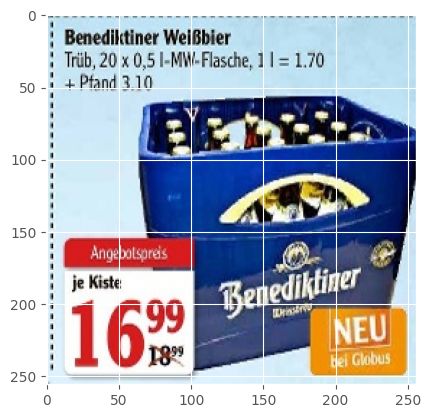

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy array


# Choose an index to display (for example, the first image)
image_index = 0

# Display the image
plt.imshow(x_train[0])  # 'gray' is for grayscale images
plt.show()


In [8]:
import os
import shutil
import random

# Set the paths
test_data_path = '/content/products_leaflets_256/test'
validation_data_path = '/content/products_leaflets_256/validation'

# Create the validation directory if it doesn't exist
os.makedirs(validation_data_path, exist_ok=True)

# Iterate through subfolders in the test dataset
for subfolder in os.listdir(test_data_path):
    subfolder_path = os.path.join(test_data_path, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Get a list of images in the subfolder
        images = [f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

        # Calculate the number of images to move (50%)
        num_images_to_move = int(0.5 * len(images))

        # Randomly select images to move
        images_to_move = random.sample(images, num_images_to_move)

        # Create the corresponding subfolder in the validation directory
        validation_subfolder_path = os.path.join(validation_data_path, subfolder)
        os.makedirs(validation_subfolder_path, exist_ok=True)

        # Move selected images to the validation subfolder
        for image_to_move in images_to_move:
            source_path = os.path.join(subfolder_path, image_to_move)
            destination_path = os.path.join(validation_subfolder_path, image_to_move)
            shutil.move(source_path, destination_path)

print("Validation dataset created successfully.")


Validation dataset created successfully.


In [7]:
desired_width = 256
desired_height = 256
data_folder = '/content/products_leaflets_256/validation'
x_validation, y_validation = load_images_from_folders(batch1_folders)

In [8]:

del x_train_batch1
del y_label_batch1

174


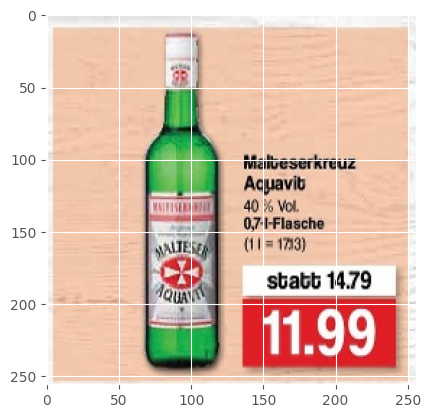

In [ ]:
plt.imshow(x_train[15079])

  # 'gray' is for grayscale images
print(y_label[15079])
plt.show()

In [11]:
print(y_label.shape)
print(y_validation.shape)

(15120,)
(1890,)


In [9]:
from tensorflow.keras.utils import to_categorical
# Number of classes (378 in your case)
num_classes = 370

# Subtract one from the class labels to account for the shift


# One-hot encode the shifted labels
y_label_encoded = to_categorical(y_label , num_classes)
y_label_encoded_validation = to_categorical(y_validation, num_classes)


In [8]:
del y_label
del y_validation

In [13]:
print(y_label_encoded_validation[1889])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [14]:
print(y_label_encoded[15079])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [10]:
conv_base = keras.applications.EfficientNetB0(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(256, 256, 3),
    include_top=False  # Do not include the ImageNet classifier at the top.
)

# Print structure in console
conv_base.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 256, 256, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 256, 256, 3)          0         ['normalization[0

In [11]:

from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(conv_base)
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


model.add(layers.Dense(370, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 average_pooling2d (Average  (None, 4, 4, 1280)        0         
 Pooling2D)                                                      
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 100)               2048100   
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dropout (Dropout)           (None, 200)               0

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 average_pooling2d (Average  (None, 4, 4, 1280)        0         
 Pooling2D)                                                      
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 100)               2048100   
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dropout (Dropout)           (None, 200)               0

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history=model.fit(x_train, y_label_encoded, validation_data=(x_validation, y_label_encoded_validation), epochs=30, batch_size=32)

Epoch 1/30
463/463 [==============================] - 217s 357ms/step - loss: 4.2091 - accuracy: 0.2091 - val_loss: 2.4381 - val_accuracy: 0.4978
Epoch 2/30
463/463 [==============================] - 161s 347ms/step - loss: 1.2736 - accuracy: 0.6793 - val_loss: 1.4183 - val_accuracy: 0.7114
Epoch 3/30
463/463 [==============================] - 161s 347ms/step - loss: 0.6364 - accuracy: 0.8327 - val_loss: 1.1721 - val_accuracy: 0.7811
Epoch 4/30
463/463 [==============================] - 161s 347ms/step - loss: 0.4339 - accuracy: 0.8858 - val_loss: 1.3716 - val_accuracy: 0.7270
Epoch 5/30
463/463 [==============================] - 161s 347ms/step - loss: 0.3801 - accuracy: 0.8991 - val_loss: 1.2300 - val_accuracy: 0.7919
Epoch 6/30
463/463 [==============================] - 161s 347ms/step - loss: 0.3334 - accuracy: 0.9102 - val_loss: 1.2519 - val_accuracy: 0.7816
Epoch 7/30
463/463 [==============================] - 160s 345ms/step - loss: 0.3085 - accuracy: 0.9182 - val_loss: 1.1919 -

In [15]:
from keras.models import load_model

# Assuming 'model' is your trained Keras model
model.save('my_model.h5')  # Save the model to a file named 'my_model.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
del x_train
del x_validation

In [18]:
desired_width = 256
desired_height = 256
data_folder = '/content/products_leaflets_256/test'
x_validation, y_validation = load_images_from_folders(batch1_folders)

In [ ]:
from tensorflow.keras.utils import to_categorical
# Number of classes (401 in your case)
num_classes = 378

# Subtract one from the class labels to account for the shift
y_label_shifted = y_label - 1


# One-hot encode the shifted labels
y_label_encoded = to_categorical(y_label_shifted, num_classes)



In [20]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

# Load the saved model
loaded_model = load_model('my_model.h5')








# Get model predictions
predictions = loaded_model.predict(x_validation)




58/58 [==============================] - 6s 72ms/step


In [21]:
y_pred_classes = np.argmax(predictions, axis=1)

In [ ]:
y_true = np.argmax(y_label_encoded, axis=1)

In [22]:
accuracy = np.mean(y_validation == y_pred_classes)

In [23]:
print(accuracy)

0.8091891891891891


In [ ]:
print(y_pred_classes)

[ 67 307 347 ... 129 334  19]


In [24]:
incorrect_indices = np.where(y_validation != y_pred_classes)[0]

In [27]:
print(len(incorrect_indices))

353


In [26]:
for idx in incorrect_indices:
    print(f"Index {idx}: True label: {y_validation[idx]}, Predicted label: {y_pred_classes[idx]}")

Index 1: True label: 0, Predicted label: 194
Index 7: True label: 1, Predicted label: 202
Index 16: True label: 3, Predicted label: 213
Index 19: True label: 3, Predicted label: 226
Index 20: True label: 4, Predicted label: 272
Index 21: True label: 4, Predicted label: 80
Index 23: True label: 4, Predicted label: 272
Index 26: True label: 5, Predicted label: 52
Index 34: True label: 6, Predicted label: 134
Index 52: True label: 10, Predicted label: 72
Index 54: True label: 10, Predicted label: 84
Index 65: True label: 13, Predicted label: 228
Index 66: True label: 13, Predicted label: 322
Index 67: True label: 13, Predicted label: 12
Index 69: True label: 13, Predicted label: 274
Index 72: True label: 14, Predicted label: 250
Index 74: True label: 14, Predicted label: 112
Index 79: True label: 15, Predicted label: 171
Index 81: True label: 16, Predicted label: 339
Index 82: True label: 16, Predicted label: 232
Index 83: True label: 16, Predicted label: 56
Index 95: True label: 19, Pred

In [28]:


# Initialize a dictionary to count occurrences
false_predictions_count = {}

# Iterate over incorrect indices
for idx in incorrect_indices:
    true_label = y_validation[idx]
    predicted_label = y_pred_classes[idx]

    # Check if the true label was predicted falsely
    if true_label != predicted_label:
        # Increment the count for the true label in the dictionary
        false_predictions_count[true_label] = false_predictions_count.get(true_label, 0) + 1

# Print the counts
for true_label, count in false_predictions_count.items():
    print(f"True label {true_label}: Incorrect predictions count = {count}")



True label 0: Incorrect predictions count = 1
True label 1: Incorrect predictions count = 1
True label 3: Incorrect predictions count = 2
True label 4: Incorrect predictions count = 3
True label 5: Incorrect predictions count = 1
True label 6: Incorrect predictions count = 1
True label 10: Incorrect predictions count = 2
True label 13: Incorrect predictions count = 4
True label 14: Incorrect predictions count = 2
True label 15: Incorrect predictions count = 1
True label 16: Incorrect predictions count = 3
True label 19: Incorrect predictions count = 2
True label 21: Incorrect predictions count = 1
True label 23: Incorrect predictions count = 1
True label 24: Incorrect predictions count = 1
True label 27: Incorrect predictions count = 1
True label 29: Incorrect predictions count = 1
True label 30: Incorrect predictions count = 4
True label 31: Incorrect predictions count = 5
True label 32: Incorrect predictions count = 3
True label 34: Incorrect predictions count = 1
True label 35: Inco